In [1]:
%reload_ext autoreload
%autoreload 2
# %autoreload 1
# %aimport from kret_studies import *
# %aimport from kret_studies.notebook_imports import *
# %load_ext fireducks.pandas # linux only for now

In [2]:
from kret_studies import *
from kret_studies.notebook import *
from kret_studies.complex import *

logger = get_notebook_logger()

Loaded environment variables from /Users/Akseldkw/coding/kretsinger/.env.
/Users/Akseldkw/coding/kretsinger/data/nb_log.log


In [ ]:
df = pd.read_csv("/Users/Akseldkw/coding/kretsinger/data/Project_train.csv")
y_var = "TARGET"
# df.columns = [col if col == "TARGET" else (col if col == df.columns[0] else f"col_{i}") for i, col in enumerate(df.columns)]
df.columns = [col if col == y_var else f"col_{i}" for i, col in enumerate(df.columns)]

In [52]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'TARGET'],
      dtype='object')

In [53]:
uks_pd.data_cleanup(df)
df = uks_pd.one_hot_encode(df)
df = uks_pd.move_columns(df, end=["TARGET"])
X, y = uks_pd.split_x_y(df, "TARGET")

In [54]:
corr = df.corr()

In [55]:
corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,TARGET
col_0,1.000000,0.094494,-0.547702,-0.547675,-0.547694,-0.000465,0.000171,-0.002779,0.000644,0.000522,...,0.003328,-0.000260,-0.001980,-0.001195,-0.001709,0.000159,0.005299,0.001020,0.002169,-0.001001
col_1,0.094494,1.000000,-0.054325,-0.054320,-0.054337,0.000904,-0.000097,-0.008810,-0.001629,-0.004573,...,-0.006675,-0.000440,-0.006988,-0.004976,-0.007022,-0.000871,-0.011482,-0.005428,-0.008043,-0.006287
col_2,-0.547702,-0.054325,1.000000,0.999951,0.999992,0.001100,0.001287,0.001175,0.003614,0.003360,...,-0.005820,0.000816,0.005032,0.003314,0.004626,-0.000341,-0.004765,-0.001930,-0.003215,-0.003630
col_3,-0.547675,-0.054320,0.999951,1.000000,0.999942,0.001192,0.001259,0.001123,0.003587,0.003320,...,-0.005969,0.000117,0.004852,0.003005,0.004376,-0.000991,-0.004930,-0.002195,-0.003427,-0.003625
col_4,-0.547694,-0.054337,0.999992,0.999942,1.000000,0.001123,0.001269,0.001182,0.003621,0.003374,...,-0.005837,0.000815,0.005035,0.003316,0.004630,-0.000349,-0.004776,-0.001944,-0.003227,-0.003635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_63,0.000159,-0.000871,-0.000341,-0.000991,-0.000349,-0.098427,0.261464,0.006462,0.002478,-0.000921,...,0.377642,0.720102,0.229219,0.458625,0.355054,1.000000,0.271361,0.586588,0.440133,-0.005877
col_64,0.005299,-0.011482,-0.004765,-0.004930,-0.004776,-0.110287,0.185732,0.294561,0.360295,0.377459,...,0.841738,0.151073,0.549481,0.382806,0.473006,0.271361,1.000000,0.705697,0.868524,0.010699
col_65,0.001020,-0.005428,-0.001930,-0.002195,-0.001944,-0.120956,0.363272,0.053128,0.257430,0.150977,...,0.868476,0.364771,0.482247,0.646897,0.623514,0.586588,0.705697,1.000000,0.943987,0.005446
col_66,0.002169,-0.008043,-0.003215,-0.003427,-0.003227,-0.119340,0.292627,0.118803,0.351737,0.265907,...,0.941759,0.259975,0.542532,0.566714,0.609221,0.440133,0.868524,0.943987,1.000000,0.008712


In [56]:
corr = df.corr(numeric_only=True)
fig, ax = uks_mpl.subplots(1, 1, 8, 8)
uks_mpl.heatmap_df(corr, ax=ax)

{'annot': True, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x302492a50>, 'linewidths': 0.1, 'cbar': True, 'vmin': -1.0, 'vmax': 1.0, 'fmt': '.2f', 'ax': <Axes: >}


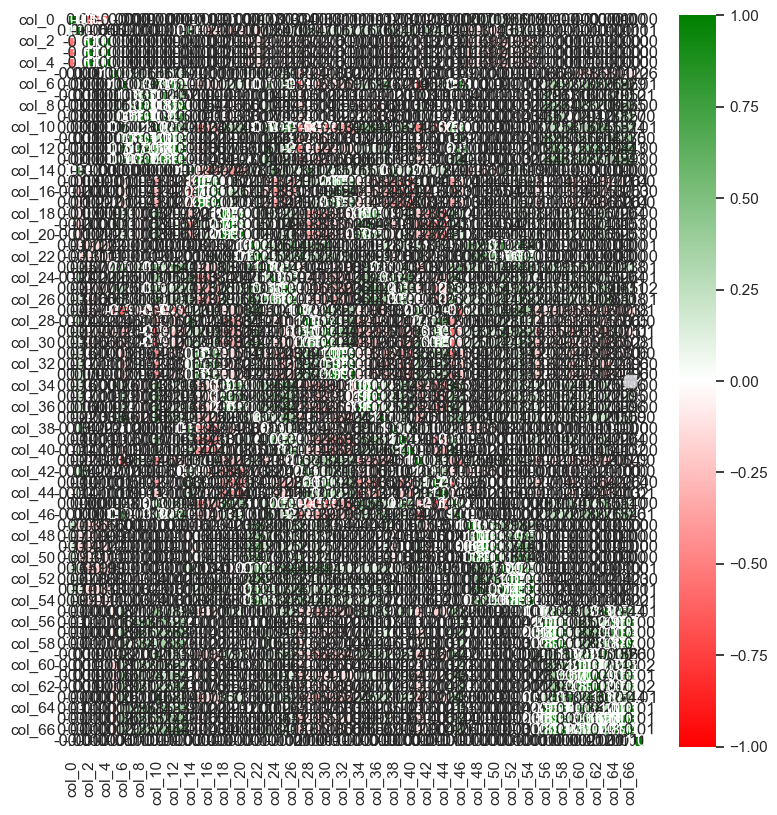

In [57]:
fig

In [58]:
pipeline = Pipeline([("scaler", StandardScaler()), ("enet", ElasticNet(alpha=0.5, l1_ratio=0.3, random_state=SEED))])
lgbm_elastic = LGBMRegressor(**LGBM_DEFAULT_PARAMS)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

print("Training Stage 1 (ElasticNet) on training data...")
pipeline.fit(X_train, y_train)
y_train_pred_stage1 = pipeline.predict(X_train)

residuals = y_train - y_train_pred_stage1

print("Training Stage 2 (LGBMRegressor) on residuals...")
lgbm_elastic.fit(X_train, residuals)

y_val_pred_stage1 = pipeline.predict(X_val)
y_val_pred_stage2 = t.cast(np.ndarray, lgbm_elastic.predict(X_val))

y_pred_elastic_lgbm = y_val_pred_stage1 + y_val_pred_stage2
print(f"R^2 Score: {r2_score(y_val, y_pred_elastic_lgbm):.4f}")

Training Stage 1 (ElasticNet) on training data...
Training Stage 2 (LGBMRegressor) on residuals...
R^2 Score: 0.0026
